# Trabajo Practico: Bagging

## Imports iniciales:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from preprocesamiento import feature_engineering
from preprocesamiento import obtenerDFTraining
from preprocesamiento import preprocesar_data_frame

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
RANDOM_STATE = 19 * 103785

## Bagging

Bagging es un ensamble que se basa en dividir un datset en varios subset's y luego construir un unico modelo predictivo a partir  de los anteriores, con votaciones. De esta forma disminuimos la varianza en nuestro modelo final y el overfitting.

In [2]:
from preprocesamiento import metricas
from preprocesamiento import preprocesar_df_pca
from preprocesamiento import preprocesar_normalize_scaler
from sklearn.preprocessing import Normalizer

In [3]:
df = obtenerDFTraining()
X, y = preprocesar_data_frame(df)
X = preprocesar_normalize_scaler(X)
X = preprocesar_df_pca(X, 30)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

Para este modelo decidimos utilizar PCA y normalize scaler para el preprocesamiento y arboles profundos como estimador.

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6196
           1       0.72      0.58      0.64      1936

    accuracy                           0.85      8132
   macro avg       0.80      0.76      0.77      8132
weighted avg       0.84      0.85      0.84      8132



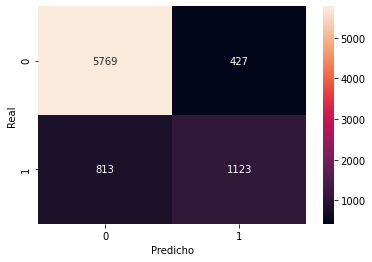

Recall: 0.58
Precision: 0.72
Acc: 0.85
Roc: 0.9


In [4]:
clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy', max_depth = 12),
                        n_estimators=100, verbose=0, n_jobs=-1,random_state=RANDOM_STATE) 

clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))
metricas(y_test,clf.predict(x_test),x_test,clf)

## Prediccion sobre el Holdout

In [6]:
from preprocesamiento import obtenerDFHoldout
from preprocesamiento import escribir_predicciones_a_archivo

holdout = obtenerDFHoldout()
holdout.drop(columns=['representatividad_poblacional'], inplace=True)

ids = np.array(holdout['id'])
holdout = preprocesar_normalize_scaler(holdout)
holdout = preprocesar_df_pca(holdout,30)

predicciones_holdout = clf.predict(holdout)
escribir_predicciones_a_archivo(predicciones_holdout,"Bagging",ids)